In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3)

In [4]:
X

array([[-9.79987205,  3.49085481],
       [ 2.0154735 , 11.40192577],
       [-7.31242293,  2.42215765],
       ...,
       [ 2.65135001,  9.11900296],
       [ 1.99699142,  8.45863485],
       [-7.9821914 ,  3.01790923]])

In [5]:
y

array([1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1,
       1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 0, 1,
       0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 0,

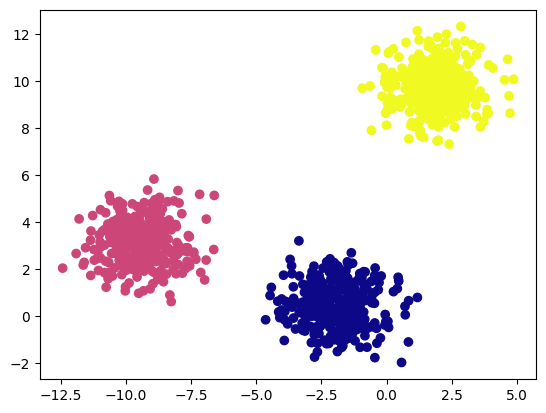

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='plasma')

In [7]:
## Standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
##ELBOW METHOD
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1340.0,
 380.1787837731126,
 66.81538035530004,
 57.85704129499915,
 50.20630746103845,
 47.72308975583212,
 38.95302300287603,
 33.909564397457984,
 31.366743240695723,
 25.86794221028683]

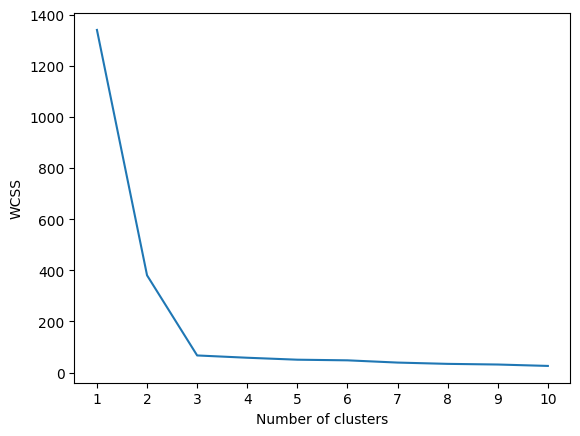

In [13]:
##plotting the elbow graph
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [20]:
kmeans.fit(X_train_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [21]:
y_pred=kmeans.predict(X_test_scaled)

In [22]:
y_pred

array([1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1,
       0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1,
       1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2,
       2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 2, 2, 0,
       1, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2,
       0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,

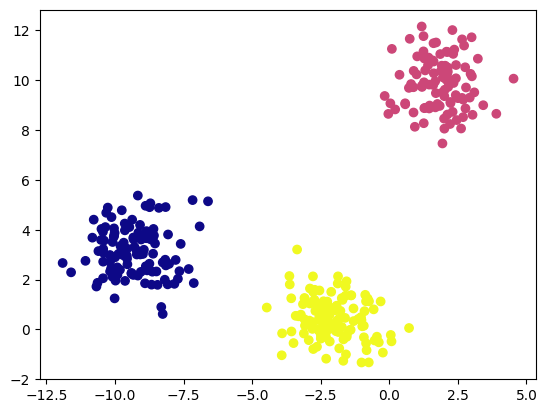

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='plasma')

In [24]:
##validation k value kneelocator s=2 silhoutee

In [25]:
%pip install kneed
from kneed import KneeLocator


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [26]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [27]:
kl.elbow

np.int64(3)

In [29]:
## silhouette score
from sklearn.metrics import silhouette_score


In [34]:
silhouette_coefficient=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    
    silhouette_coefficient.append(score)
    

In [35]:
silhouette_coefficient

[0.6834508154255257,
 0.7901948833615259,
 0.6532457968821374,
 0.4494832683673671,
 0.5106687477358003,
 0.33763244539075943,
 0.3473807676600861,
 0.3503915908921448,
 0.354826715400523]

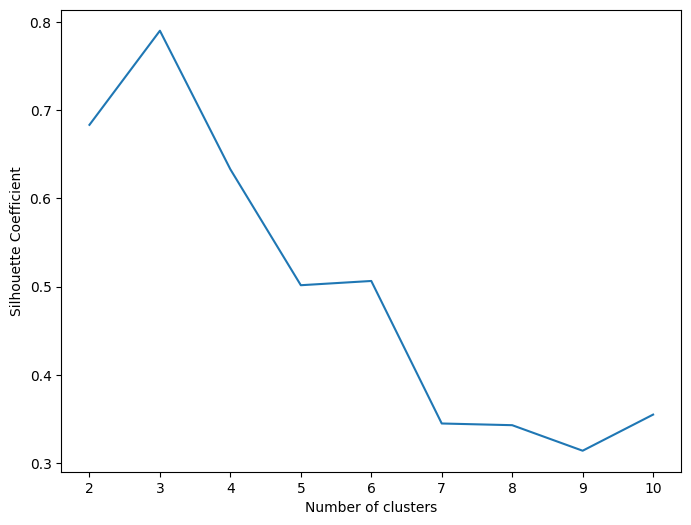

In [32]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()